import libraries

In [20]:
from dtocs import *
from helper import *
from maps import *
import numpy as np
import matplotlib.pyplot as plt
from rasterData import *
import os


# Split the data 

In [21]:
par_dir = '/Users/aakash/Desktop/MTP2/code'
# w/o roads
# map_data_tif_path = par_dir + '/data/merged_file.tif'
# output_data_dir = par_dir + '/data/tile_data'
# w/ roads
map_data_tif_path = par_dir + '/data/merged_file_w_roads.tif'
output_data_dir = par_dir + '/data/tile_data_water'

tile_size = 512
SPLIT_DATA = False


if(SPLIT_DATA):
    split_tif_into_tiles(map_data_tif_path, output_data_dir, tile_size)

# Merge According to bounding box

In [22]:
# src_lat, src_lon = 31.794790544810002, 76.99715247898794
src_lat, src_lon = 31.805, 77.0858
bounding_box = getBoundingBoxFromAPoint(src_lat, src_lon, 30)

In [23]:
merged_data_path  = par_dir + '/data/temp/file.tif'
# outfile = par_dir + '/data/temp/file2.tif'
# manali (hanuman tibba - manali)
# lon1, lat1 = 76.95459234317525,31.801679137058297
# lon2, lat2 = 77.02411520084127,31.764177519360725

# bounding box = (left, bottom, right, top)
# bounding_box = (lon1, lat2, lon2, lat1)
# bounding_box = (76.98328796870653,31.70144173323603, 77.01350037105028,31.737946830245892)

mergeFiles(output_data_dir, merged_data_path, bounding_box)
# cropBoundingBox(merged_data_path,outfile, bounding_box)
# merged_data_path = outfile
# merge_dem_files(elevation_split_dir, merged_elevation_path, bounding_box)
# merge_dem_files(landcover_split_dir, merged_landcover_path, bounding_box)

6 files merged


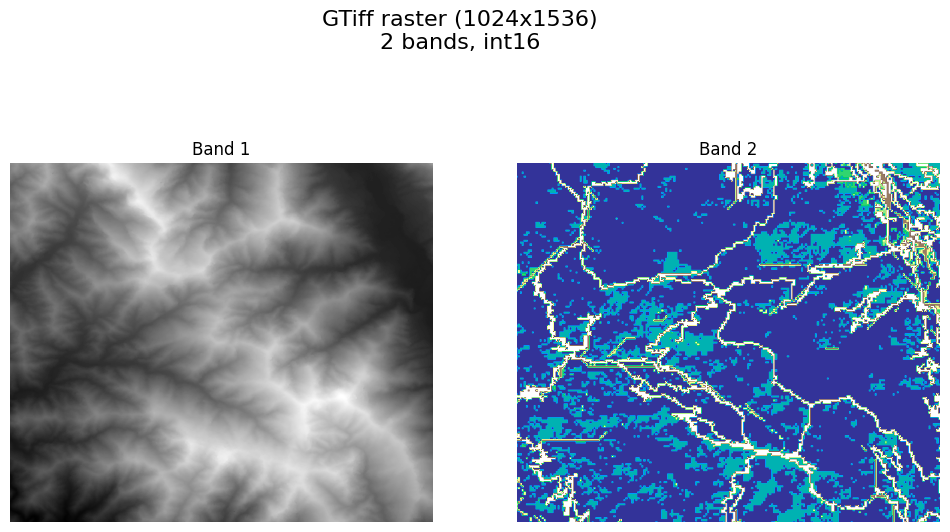

In [24]:
bbox = bounding_box
plot_multiband_raster(merged_data_path,bbox)

In [25]:
# show_dem(merged_data_path)
# show_dem("/Users/aakash/Desktop/MTP2/code/clipped.tif")
# show_dem(merged_elevation_path,'gray')
# show_dem(merged_landcover_path)

# Bounding box and path dataset filepath
- Add lat1,lon1 and lat2,lon2
- Change resolution
- Add dataset(.tif files) filepath (for GDAL interface (without tiling))

In [26]:
resolution = 30

# Generate Matrix
- Using GDAL tile interface

In [27]:
map_data, bounds, tf = getDataBoundingBox(merged_data_path, bbox)

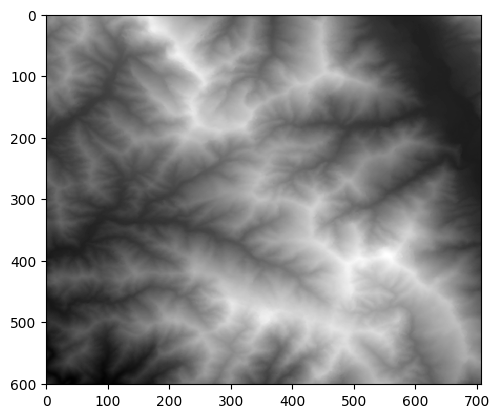

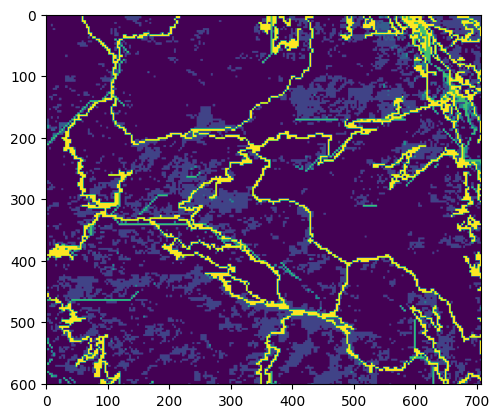

(2, 601, 707)


In [28]:
plt.imshow(map_data[0],cmap='terrain')
plt.imshow(map_data[0],cmap='gray')
plt.show()
plt.imshow(map_data[1])
plt.show()
print(map_data.shape)

In [29]:
print("Elevation Map Info")
print(f"Gray Map Shape: {map_data[0].shape}")
print(f"Min: {map_data[0].min()}")
print(f"Max: {map_data[0].max()}")

Elevation Map Info
Gray Map Shape: (601, 707)
Min: 799
Max: 2988


Source and Destination

In [30]:

src_lat, src_lon = 31.794790544810002, 76.99715247898794
src_latIdx,src_lonIdx = findIndexFromCoordinate(bounding_box, map_data[0], src_lon, src_lat)


In [31]:
print(src_latIdx,src_lonIdx)
# print(des_latIdx,des_lonIdx)


338 24


Dijkstra

In [32]:
# from dijkstra import dijkstraFromSrc, dijkstraFromSrcWithLC, showPathDijkstra
from dijkstra import dijkstraFromSrc, showPath, generatePath, dijkstraFromSrcToRoad

In [33]:
alpha = 0
h_weight = 0.1
slope = 30

distFromSrc, parentMat, (des_latIdx, des_lonIdx) = dijkstraFromSrcToRoad(map_data[0], map_data[1], src_latIdx, src_lonIdx,alpha,h_weight,resolution,slope)


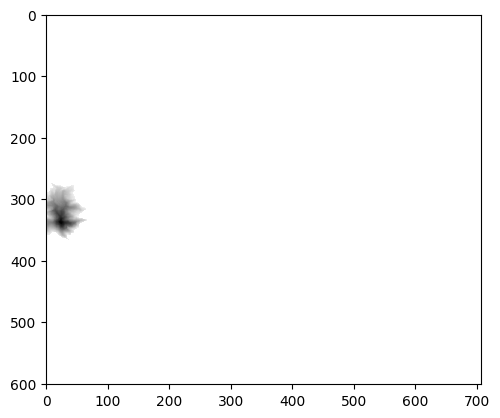

In [34]:
plt.imshow(distFromSrc,cmap='gray')
plt.show()

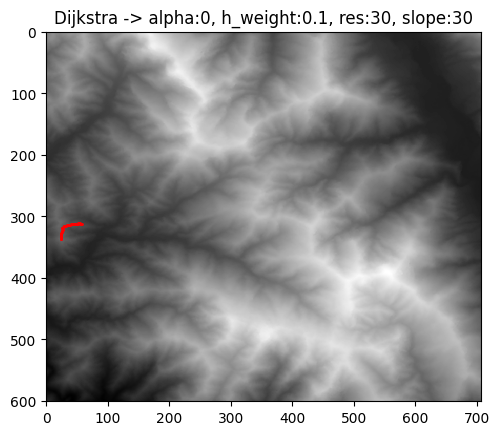

In [17]:
showPath(map_data[0], parentMat, src_latIdx, src_lonIdx, des_latIdx, des_lonIdx,alpha,h_weight,resolution,slope)

In [91]:
src = (src_latIdx,src_lonIdx)
des = (des_latIdx,des_lonIdx)
a = generatePath(map_data[0], parentMat,src ,des )

In [92]:
a

array([[274, 387],
       [274, 386],
       [274, 385],
       [274, 384],
       [273, 383],
       [273, 382],
       [273, 381],
       [274, 380],
       [274, 379],
       [274, 378],
       [274, 377],
       [274, 376],
       [274, 375],
       [274, 374],
       [274, 373],
       [274, 372],
       [275, 371],
       [275, 370],
       [275, 369],
       [276, 368],
       [276, 367],
       [276, 366],
       [276, 365],
       [276, 364],
       [276, 363],
       [276, 362],
       [277, 361],
       [277, 360],
       [277, 359],
       [277, 358],
       [278, 357],
       [279, 356],
       [280, 355],
       [281, 355],
       [282, 356],
       [283, 356],
       [284, 356],
       [285, 355],
       [286, 355],
       [287, 355],
       [288, 354],
       [289, 353],
       [290, 352],
       [291, 352],
       [292, 352],
       [293, 352],
       [294, 352],
       [295, 352],
       [296, 352],
       [297, 353],
       [298, 353],
       [299, 353]])